<a href="https://colab.research.google.com/github/arkdab/AMAZ/blob/master/day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor #because it is value continious
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv")
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [0]:
df[df.tripId == 6351558574044883205] 

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [0]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

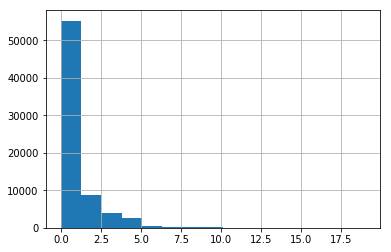

In [0]:
df.delay.hist(bins=15);

In [0]:
list(df)
df.describe

<bound method NDFrame.describe of        index           time_stamp  stop                         stopName  \
0          1  2018-07-23 06:00:45   378                       Os.Piastów   
1          1  2018-07-23 06:00:47   612                         Borsucza   
2          1  2018-07-23 06:00:48   572                           Smolki   
3          1  2018-07-23 06:00:49   319                          Jubilat   
4          1  2018-07-23 06:00:49   322                      Filharmonia   
5          1  2018-07-23 06:00:50   325                            Wawel   
6          1  2018-07-23 06:00:50  1360         Plac Wszystkich Świętych   
7          1  2018-07-23 06:00:51   363                     Hala Targowa   
8          1  2018-07-23 06:00:52    78                         Batorego   
9          1  2018-07-23 06:00:52    77                   Teatr Bagatela   
10         1  2018-07-23 06:00:53   131                   Dworzec Główny   
11         1  2018-07-23 06:00:54   715               

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
X = df[["number"]].values
y = df['delay_secs'].values

model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-54.76551206303637, 3.233672761673034)

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
X = df[["number","stop",]].values
y = df['delay_secs'].values

model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-53.08641170407217, 3.205098659540954)

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]

X = df[["number","stop","direction_cat"]].values
y = df['delay_secs'].values

model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-51.24291643569068, 3.010946095866869)

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

X = df[["number","stop","direction_cat","vehicleId","seq_num"]].values
y = df['delay_secs'].values

model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.8788430981438, 2.5323457738906088)

In [0]:
pd.factorize( [
    '{} {}'.format(7, "B"),
    '{} {}'.format(7, "A"),
    '{} {}'.format(2, "B"),
    '{} {}'.format(2, "A"),
])[0]

array([0, 1, 2, 3])

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

df.apply(lambda x: x)

X = df[["number","stop","direction_cat","vehicleId","seq_num"]].values
y = df['delay_secs'].values

model = RandomForestRegressor(max_depth = 10, n_estimators=50, n_jobs=8)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.282222781745595, 2.469759723329022)

In [0]:
df.apply(lambda x: '{}{}'.format(x['number'], x['direction']),axis=1).head().factorize()[0]

array([0, 1, 2, 3, 4])

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

df.apply(lambda x: '{}{}'.format(x['number'], x['direction']),axis=1).factorize()[0]

X = df[["number","stop","direction_cat","vehicleId","seq_num"]].values
y = df['delay_secs'].values

model = RandomForestRegressor(max_depth = 10, n_estimators=50, n_jobs=8)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.29291072754054, 2.4261791372414576)

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

def gen_id_num_direction(x):
    return '{}{}'.format(x['number'], x['direction'])

df.apply(gen_id_num_direction ,axis=1).factorize()[0]

X = df[["number","stop","direction_cat","vehicleId","seq_num"]].values
y = df['delay_secs'].values

model = RandomForestRegressor(max_depth = 10, n_estimators=50, n_jobs=8)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.2997508812064, 2.421820370326555)

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

def gen_id_num_direction(x):
    return '{}{}'.format(x['number'], x['direction'])
df['number_direction_id'] = df.apply(gen_id_num_direction ,axis=1).factorize()[0]

def gen_id_stop_direction(x):
    return '{}{}'.format(x['stop'], x['direction'])
df['stop_direction_id'] = df.apply(gen_id_stop_direction ,axis=1).factorize()[0]

feats = [
    "number",
    "stop",
    "direction_cat",
    "vehicleId",
    "seq_num",
    "number_direction_id",
    "stop_direction_id"
] 

X = df[feats].values
y = df['delay_secs'].values

model = RandomForestRegressor(max_depth = 10, n_estimators=50, n_jobs=8)
scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.41676255088726, 2.4859117179307684)

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

def gen_id_num_direction(x):
    return '{}{}'.format(x['number'], x['direction'])
df['number_direction_id'] = df.apply(gen_id_num_direction ,axis=1).factorize()[0]

def gen_id_stop_direction(x):
    return '{}{}'.format(x['stop'], x['direction'])
df['stop_direction_id'] = df.apply(gen_id_stop_direction ,axis=1).factorize()[0]

feats = [
    "number",
    "stop",
    "direction_cat",
    "vehicleId",
    "seq_num",
    "number_direction_id",
    "stop_direction_id"
] 

X = df[feats].values
y = df['delay_secs'].values

# model = RandomForestRegressor(max_depth = 10, n_estimators=50, n_jobs=8)
model = DecisionTreeRegressor(max_depth = 10, random_state=0)

scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.911446275525776, 2.5252312592564357)

In [0]:
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

def gen_id_num_direction(x):
    return '{}{}'.format(x['number'], x['direction'])
df['number_direction_id'] = df.apply(gen_id_num_direction ,axis=1).factorize()[0]

def gen_id_stop_direction(x):
    return '{}{}'.format(x['stop'], x['direction'])
df['stop_direction_id'] = df.apply(gen_id_stop_direction ,axis=1).factorize()[0]

feats = [
    "number",
    "stop",
    "direction_cat",
    "vehicleId",
    "seq_num",
    "number_direction_id",
    "stop_direction_id"
] 

X = df[feats].values
y = df['delay_secs'].values

# model = RandomForestRegressor(max_depth = 10, n_estimators=50, n_jobs=8)
model = DecisionTreeRegressor(max_depth = 10, random_state=0)

scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.911446275525776, 2.5252312592564357)

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv")
# df1 = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv")
# df = pd.concat([df,df1])
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [0]:
df[['plannedTime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 1 columns):
plannedTime    71517 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 558.8 KB


In [0]:
df['plannedTime'] = pd.to_datetime(df['plannedTime'])
df[['plannedTime']].info()

df['plannedTime'].dt.month
df['plannedTime'].dt.month.count()
df['plannedTime'].dt.month.unique()
df['plannedTime'].dt.hour.unique()
df['plannedTime'].dt.hour.value_counts()
# for h in df['plannedTime'].dt.hour.unique(): print(h)
df[df['plannedTime'].dt.hour == 10]
# for h in hour_list: print(h)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 1 columns):
plannedTime    71517 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 558.8 KB


,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num,planndedTime
17888,633,2018-07-23 09:58:49,126,Lubicz,2,Salwator,2018-07-23 10:00:00,6.352185e+18,6351558574044412172,PREDICTED,0,4.0,2018-07-23 10:00:00
17934,635,2018-07-23 09:59:31,2691,Chmieleniec,11,Czerwone Maki P+R,2018-07-23 10:00:00,6.352185e+18,6351558574044674311,PREDICTED,0,21.0,2018-07-23 10:00:00
17937,635,2018-07-23 09:59:33,320,Reymana,20,Cichy Kącik,2018-07-23 10:00:00,6.352185e+18,6351558574044846344,STOPPING,0,18.0,2018-07-23 10:00:00
17957,635,2018-07-23 09:59:47,383,Rondo Piastowskie,14,Mistrzejowice,2018-07-23 10:00:00,6.352185e+18,6351558574044735749,STOPPING,0,35.0,2018-07-23 10:00:00
17966,635,2018-07-23 09:59:50,459,Kombinat,4,Wzgórza K.,2018-07-23 10:00:00,6.352185e+18,6351558574044477701,STOPPING,0,27.0,2018-07-23 10:00:00
17967,636,2018-07-23 09:59:56,571,Korona,11,Czerwone Maki P+R,2018-07-23 10:00:00,6.352185e+18,6351558574044678407,STOPPING,0,9.0,2018-07-23 10:00:00
17973,636,2018-07-23 10:00:00,135,Bronowice Małe,14,Mistrzejowice,2018-07-23 10:00:00,6.352185e+18,6351558574044748038,STOPPING,0,1.0,2018-07-23 10:00:00
17977,636,2018-07-23 10:00:04,679,Ćwiklińskiej,13,Nowy Bieżanów P+R,2018-07-23 10:01:00,6.352185e+18,6351558574044715270,STOPPING,0,27.0,2018-07-23 10:01:00
17981,636,2018-07-23 10:00:06,129,Cystersów,52,Czerwone Maki P+R,2018-07-23 10:00:00,6.352185e+18,6351558574045030662,STOPPING,0,18.0,2018-07-23 10:00:00
17984,637,2018-07-23 10:00:15,2690,Kampus UJ,52,Os.Piastów,2018-07-23 10:00:00,6.352185e+18,6351558574045075717,STOPPING,0,3.0,2018-07-23 10:00:00


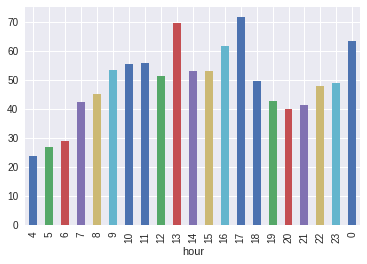

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv")
# df.head()

df['plannedTime'] = pd.to_datetime(df['plannedTime'])
df['delay_secs'] = df ['delay'].map(lambda x: x*60)
df['direction_cat'] = df ['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1,inplace = True)

def gen_id_num_direction(x):
    return '{}{}'.format(x['number'], x['direction'])
df['number_direction_id'] = df.apply(gen_id_num_direction ,axis=1).factorize()[0]

def gen_id_stop_direction(x):
    return '{}{}'.format(x['stop'], x['direction'])
df['stop_direction_id'] = df.apply(gen_id_stop_direction ,axis=1).factorize()[0]

feats = [
    "number",
    "stop",
    "direction_cat",
    "vehicleId",
    "seq_num",
    "number_direction_id",
    "stop_direction_id"
] 
def get_hour_meandealay_stderr(h,dfh):
    X = dfh[feats].values
    y = dfh['delay_secs'].values
    model = DecisionTreeRegressor(max_depth = 10, random_state=0)
    scores = cross_val_score(model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
    return [h, abs(np.mean(scores)), np.std(scores)]
   
results = [get_hour_meandealay_stderr(h,df[df['plannedTime'].dt.hour == h]) for h in df['plannedTime'].dt.hour.unique()]
dfr = pd.DataFrame(results, columns = ['hour','delay','stderr'])
dfr.set_index('hour',inplace=True)
dfr.delay.plot(kind='bar');


In [0]:
type(results[1])

list

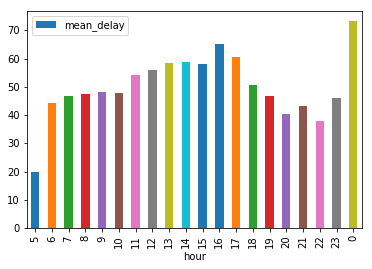

In [0]:
dfr.plot(kind='bar',x='hour',y='delay');


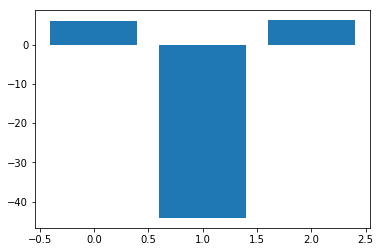

In [0]:
y_pos = np.arange(len(results[0]))
plt.bar(y_pos,results[1],align='center')
# plt.xticks(y_pos, results[0])

plt.show()
